# Математическая статистика

Если теория вероятностей — это игра по известным правилам, то статистика — это попытка понять правила игры, наблюдая за ее ходом. У нас есть данные, и мы хотим использовать их, чтобы узнать что-то о мире.

## Случайная выборка из генеральной совокупности

*   **Генеральная совокупность (Population):** Это *все* объекты, которые нас интересуют. Например, *все* жители города, *все* произведенные на заводе детали. Изучить генеральную совокупность целиком почти всегда невозможно — это слишком дорого или долго.

*   **Выборка (Sample):** Это небольшая, случайно отобранная часть генеральной совокупности, которую мы непосредственно изучаем.

**Главная задача статистики** — по характеристикам выборки сделать обоснованные выводы о характеристиках всей генеральной совокупности. Чтобы эти выводы были верными, выборка должна быть **репрезентативной**, то есть хорошо отражать структуру всей совокупности. Лучший способ этого добиться — случайный отбор.

In [9]:
import numpy as np

# Сгенерируем 1000 случайных чисел из экспоненциального распределения
# Оно сильно "скошено" влево, что делает его интересным для анализа
np.random.seed(42) # для воспроизводимости результатов
sample_data = np.random.exponential(scale=2, size=1000)
sample_data[:50]

array([0.93853618, 6.02024286, 2.63349139, 1.82588511, 0.33924974,
       0.33919258, 0.11967754, 4.02246173, 1.83816431, 2.46250012,
       0.04159862, 7.00711495, 3.57285909, 0.47737525, 0.40135798,
       0.40522285, 0.72550746, 1.48785566, 1.13107413, 0.68844599,
       1.89274175, 0.30046906, 0.69103102, 0.91255444, 1.21786938,
       3.07587202, 0.44547172, 1.44405831, 1.79500944, 0.0951277 ,
       1.87066604, 0.3739225 , 0.13452786, 5.94737559, 6.74126068,
       3.30466315, 0.72657572, 0.20555463, 2.30550153, 1.16018169,
       0.26030447, 1.36709446, 0.06998744, 4.80084577, 0.59891555,
       2.1725116 , 0.74709316, 1.46822179, 1.5824476 , 0.4087772 ])

## Описательные статистики

Это первый шаг в любом анализе данных. Мы считаем простые показатели, которые описывают нашу **выборку**.

*   **Меры центральной тенденции (где "центр" данных?):**
    *   **Среднее (Mean):** Сумма всех значений, деленная на их количество. Очень чувствительно к выбросам.
    *   **Медиана (Median):** Значение, которое находится ровно посередине отсортированного набора данных. 50% данных меньше медианы, 50% — больше. Не чувствительна к выбросам.
    *   **Мода (Mode):** Самое часто встречающееся значение в наборе данных.

*   **Меры изменчивости (насколько данные "разбросаны"?):**
    *   **Дисперсия (Variance, $\sigma^2$):** Средний квадрат отклонений значений от их среднего. Показывает, насколько данные в среднем "далеки" от центра.
    *   **Стандартное отклонение (Standard Deviation, $\sigma$):** Корень из дисперсии. Удобнее, так как измеряется в тех же единицах, что и сами данные.

*   **Меры формы распределения:**
    *   **Асимметрия (Skewness):** Показывает, "скошен" ли график распределения данных в одну из сторон.
    - **Эксцесс (Kurtosis):** Показывает, насколько "остроконечным" или "плоским" является пик распределения по сравнению с нормальным.

Давайте посчитаем основные показатели для нашей сгенерированной случайной выборки.

Среднее: 1.95
Медиана: 1.37
Дисперсия: 3.78
Стандартное отклонение: 1.94


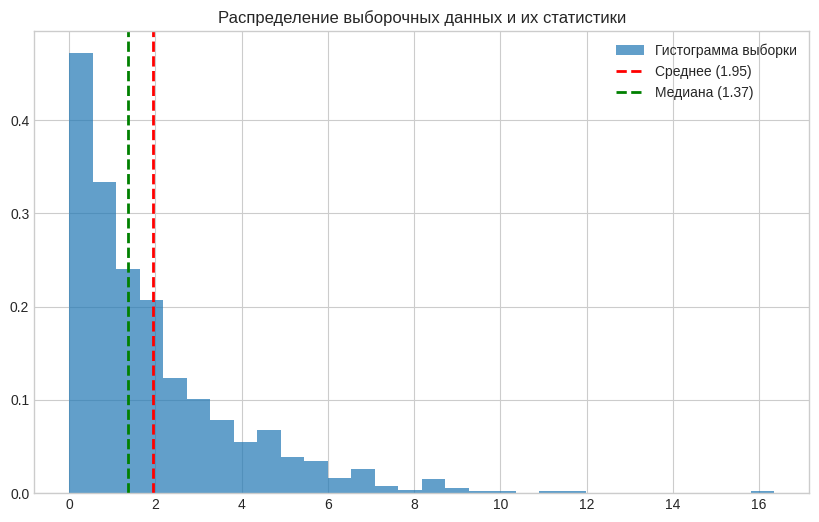

Обратите внимание, что для скошенных распределений среднее и медиана не совпадают.


In [11]:
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')

# Расчет описательных статистик
mean = np.mean(sample_data)
median = np.median(sample_data)
variance = np.var(sample_data)
std_dev = np.std(sample_data)

print(f"Среднее: {mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Стандартное отклонение: {std_dev:.2f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(sample_data, bins=30, density=True, alpha=0.7, label='Гистограмма выборки')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее ({mean:.2f})')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Медиана ({median:.2f})')
plt.title('Распределение выборочных данных и их статистики')
plt.legend()
plt.show()

print("Обратите внимание, что для скошенных распределений среднее и медиана не совпадают.")

## Математическое ожидание и моменты

Эти понятия тесно связаны с описательными статистиками, но относятся к теоретическим **случайным величинам** и их распределениям, а не к конкретным выборкам.

*   **Математическое ожидание (Expectation, $E[X]$):** Это теоретический аналог среднего значения. Это среднее значение, которое мы *ожидаем* получить, если будем проводить наш случайный эксперимент бесконечное число раз. Для дискретной величины это сумма произведений каждого значения на его вероятность.

*   **Моменты:** Это обобщенное понятие.
    *   **Первый начальный момент** — это и есть математическое ожидание.
    *   **Второй центральный момент** (момент относительно среднего) — это и есть дисперсия.
    *   Третий и четвертый моменты связаны с асимметрией и эксцессом.

## Выборочное распределение и Центральная предельная теорема

Это одна из самых волшебных и фундаментальных идей в статистике.

Представьте, что мы берем из генеральной совокупности много-много выборок одинакового размера (например, 1000 выборок по 30 человек в каждой). Для каждой выборки мы считаем ее среднее значение. В итоге мы получим 1000 выборочных средних.

**Центральная предельная теорема (ЦПТ) утверждает:**

> Распределение этих выборочных средних будет стремиться к **нормальному распределению**, независимо от того, какое распределение было у исходной генеральной совокупности.

И еще два бонуса:
1.  Среднее этого распределения выборочных средних будет равно среднему самой генеральной совокупности.
2.  Стандартное отклонение этого распределения (называемое **стандартной ошибкой среднего**) будет меньше, чем у исходной совокупности, и равно $\frac{\sigma}{\sqrt{n}}$, где $n$ — размер выборки.

**Почему это так важно?** ЦПТ позволяет нам использовать свойства нормального распределения для того, чтобы делать выводы о среднем генеральной совокупности, даже если мы ничего не знаем о ее форме!

Давайте проверим это!
1.  Создадим "генеральную совокупность" (наше экспоненциальное распределение).
2.  Возьмем из нее 10,000 выборок, каждая размером 30.
3.  Для каждой выборки посчитаем ее среднее.
4.  Построим гистограмму этих 10,000 средних.

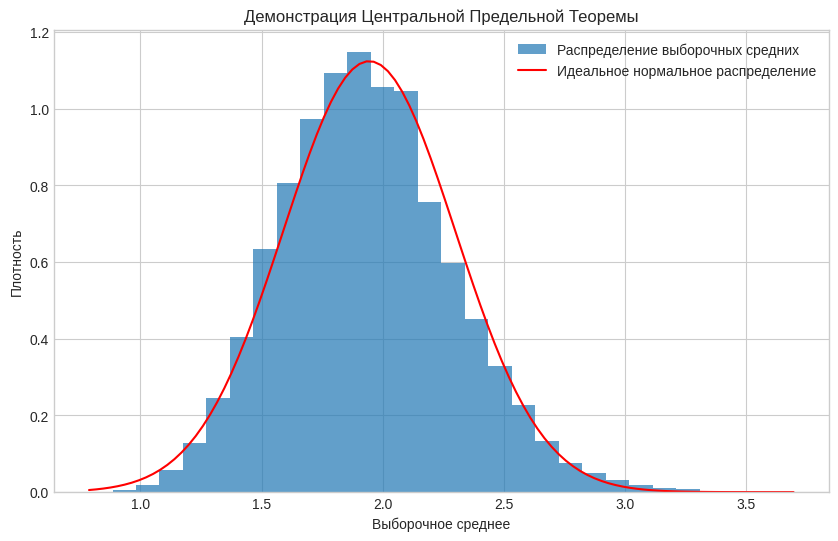

In [15]:
# Параметры симуляции
population = sample_data # Наша исходная "генеральная совокупность"
n_samples = 10000  # Количество выборок, которые мы возьмем
sample_size = 30   # Размер каждой выборки

# Собираем средние значения из каждой выборки
sample_means = []
for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample))

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.7, label='Распределение выборочных средних')

# Наложим на график идеальное нормальное распределение для сравнения
# По ЦПТ, его среднее должно быть близко к среднему популяции, а ст.откл. = ст.откл. популяции / sqrt(n)
mu_clt = np.mean(population)
sigma_clt = np.std(population) / np.sqrt(sample_size)
x = np.linspace(min(sample_means), max(sample_means), 100)
pdf_norm = stats.norm.pdf(x, mu_clt, sigma_clt)
plt.plot(x, pdf_norm, 'r-', label='Идеальное нормальное распределение')

plt.title('Демонстрация Центральной Предельной Теоремы')
plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Как по волшебству! Гистограмма выборочных средних идеально ложится на 'колокол' нормального распределения, хотя исходные данные были совсем не нормальными.

## Построение доверительных интервалов

Так как мы работаем с выборкой, мы никогда не можем узнать *точное* значение параметра генеральной совокупности (например, точное среднее). Но мы можем построить **доверительный интервал**.

**Доверительный интервал** — это диапазон значений, который с высокой вероятностью (например, 95%) содержит истинное значение параметра генеральной совокупности.

**Как это работает (упрощенно):**
1.  Берем нашу выборку и считаем выборочное среднее.
2.  Используя ЦПТ и стандартную ошибку, мы строим "сеть" вокруг нашего выборочного среднего.
3.  Ширина этой "сети" зависит от двух вещей:
    *   Размера выборки n (чем больше выборка, тем уже интервал).
    *   Выбранного уровня доверия (для 99% интервал будет шире, чем для 95%).

**Интерпретация:** Если мы построим 100 таких 95% доверительных интервалов по 100 разным выборкам, то примерно 95 из них "поймают" истинное среднее генеральной совокупности.

Давайте построим 95% доверительный интервал для среднего нашей популяции, используя всего одну выборку размером 30.

In [17]:
# Возьмем одну случайную выборку
np.random.seed(101)
single_sample = np.random.choice(population, size=sample_size)

# Параметры для расчета
sample_mean = np.mean(single_sample)
# Используем стандартное отклонение выборки (с поправкой ddof=1) как оценку ст. откл. популяции
sample_std = np.std(single_sample, ddof=1)
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2) # Z-оценка для 95% интервала

# Стандартная ошибка среднего
std_error = sample_std / np.sqrt(sample_size)
margin_of_error = z_score * std_error

# Доверительный интервал
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Выборочное среднее: {sample_mean:.2f}")
print(f"95% Доверительный интервал: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")
print(f"Истинное среднее генеральной совокупности: {np.mean(population):.2f}")

if confidence_interval[0] <= np.mean(population) <= confidence_interval[1]:
    print("\nНаш интервал 'поймал' истинное среднее! 🎉")
else:
    print("\nНам не повезло, и наш интервал не содержит истинное среднее.")

Выборочное среднее: 1.62
95% Доверительный интервал: (1.01, 2.22)
Истинное среднее генеральной совокупности: 1.95

Наш интервал 'поймал' истинное среднее! 🎉


## Проверка гипотез и ошибки I и II рода

Это формальная процедура для принятия решений на основе данных.

**Процесс:**
1.  **Формулируем нулевую гипотезу ($H_0$):** Это утверждение "по умолчанию", статус-кво. Например, "новое лекарство не эффективнее плацебо" или "средний рост мужчин в двух городах одинаков".
2.  **Формулируем альтернативную гипотезу ($H_1$):** Это то, что мы хотим доказать. Например, "новое лекарство эффективнее плацебо".
3.  **Собираем данные** и считаем тестовую статистику.
4.  **Вычисляем p-value.**

**P-value** — это вероятность получить такие же (или еще более экстремальные) данные, которые мы получили, *при условии, что нулевая гипотеза верна*.

*   **Если p-value очень маленькое** (обычно < 0.05), это означает, что наши данные очень маловероятны при условии $H_0$. У нас есть веские основания **отвергнуть нулевую гипотезу** в пользу альтернативной.
*   **Если p-value большое**, у нас нет оснований отвергать $H_0$. Мы говорим, что "не смогли отвергнуть нулевую гипотезу" (но это не значит, что мы ее доказали!).

**Ошибки при принятии решения:**
*   **Ошибка I рода (False Positive):** Мы отвергаем верную нулевую гипотезу. (Например, объявляем лекарство эффективным, хотя это не так). Вероятность этой ошибки — это наш уровень значимости $\alpha$ (обычно 0.05).
*   **Ошибка II рода (False Negative):** Мы не отвергаем неверную нулевую гипотезу. (Например, объявляем лекарство неэффективным, хотя на самом деле оно работает).



Предположим, производитель утверждает, что среднее значение для его продукта равно 1.8. Наши данные из выборки показывают среднее около 2.0. Достаточно ли этого расхождения, чтобы опровергнуть утверждение производителя?

*   **Нулевая гипотеза ($H_0$)**: Среднее популяции равно 1.8.
*   **Альтернативная гипотеза ($H_1$)**: Среднее популяции не равно 1.8.

Мы проведем **одновыборочный t-тест**, чтобы проверить это.

In [18]:
# Значение, которое мы тестируем
hypothesized_mean = 1.8

# Проводим t-тест
# Он возвращает t-статистику и p-value
t_statistic, p_value = stats.ttest_1samp(sample_data, hypothesized_mean)

print(f"t-статистика: {t_statistic:.3f}")
print(f"p-value: {p_value:.5f}")

alpha = 0.05 # Уровень значимости

if p_value < alpha:
    print(f"\np-value ({p_value:.5f}) меньше {alpha}, поэтому мы отвергаем нулевую гипотезу.")
    print("Есть статистически значимые доказательства, что среднее популяции не равно 1.8.")
else:
    print(f"\np-value ({p_value:.5f}) больше {alpha}, поэтому мы не можем отвергнуть нулевую гипотезу.")
    print("У нас нет достаточных доказательств, чтобы утверждать, что среднее популяции отличается от 1.8.")

t-статистика: 2.358
p-value: 0.01858

p-value (0.01858) меньше 0.05, поэтому мы отвергаем нулевую гипотезу.
Есть статистически значимые доказательства, что среднее популяции не равно 1.8.
